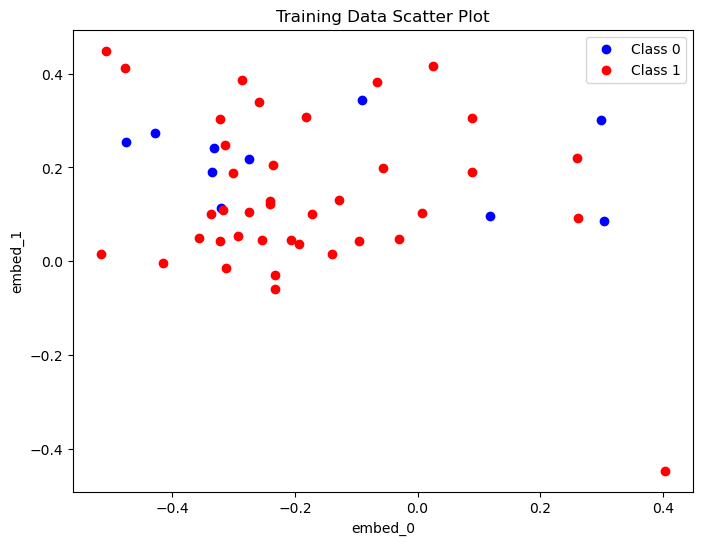

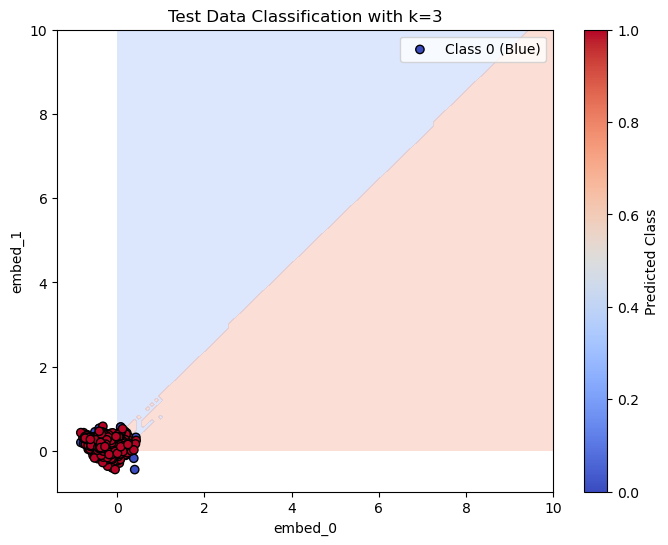

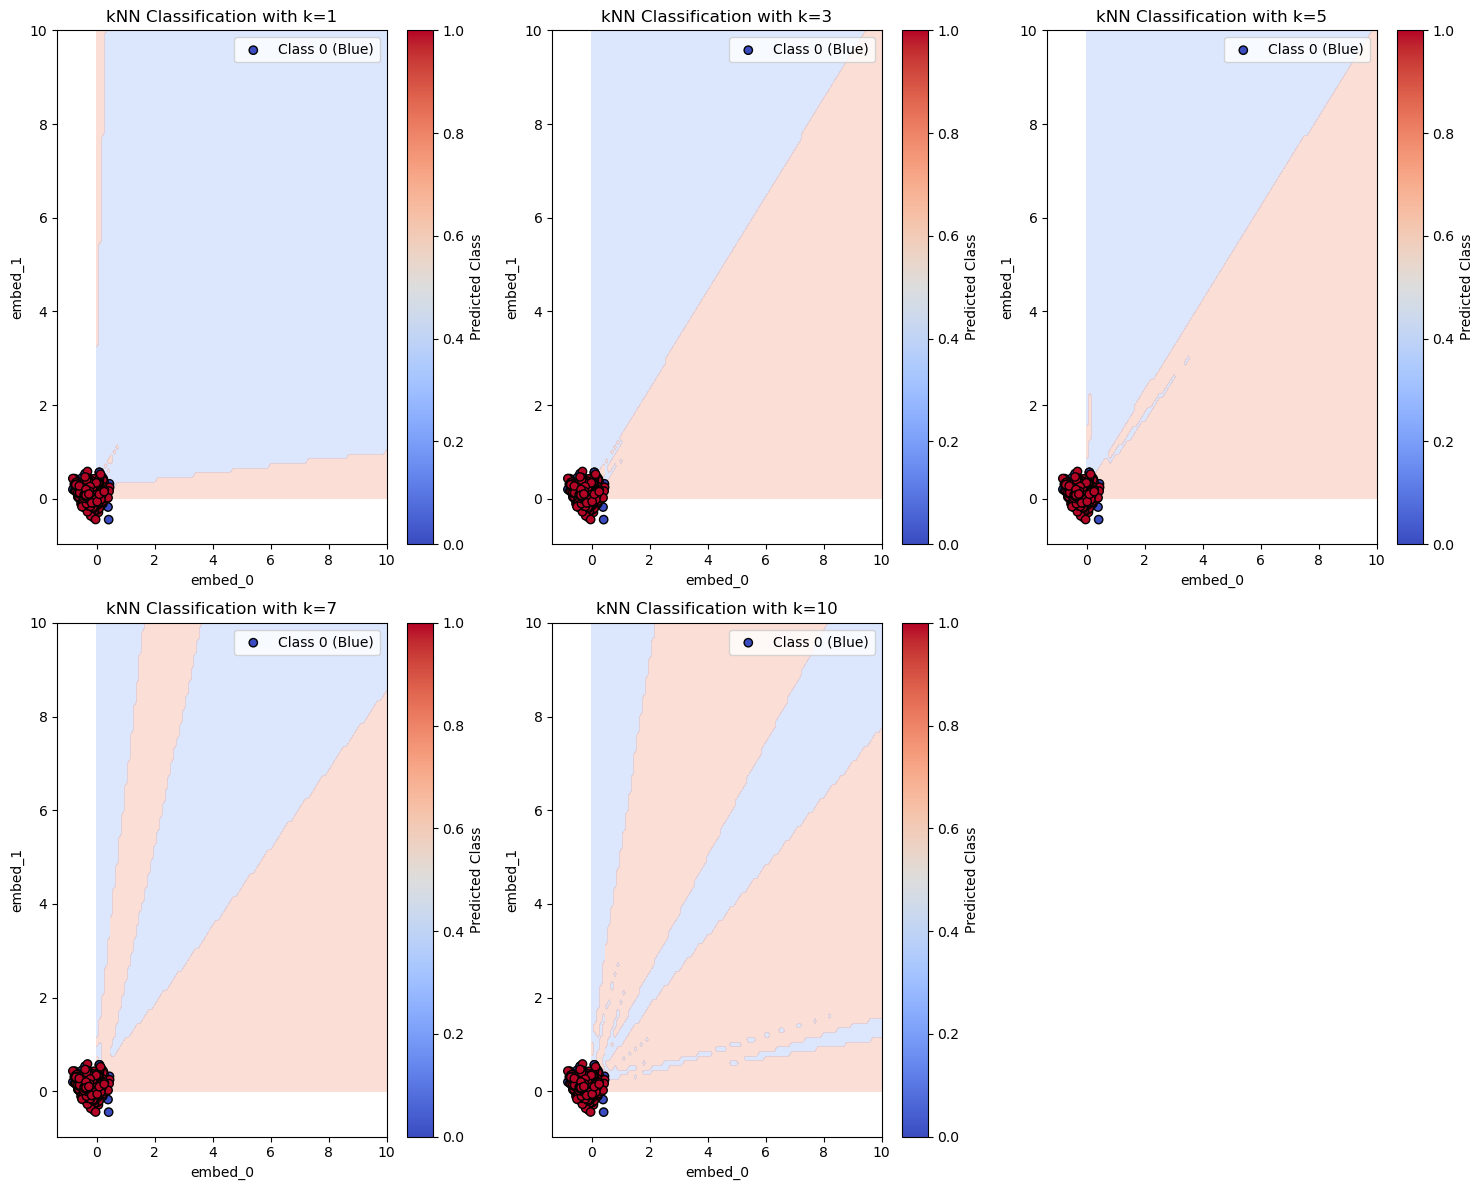

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k value from GridSearchCV: 2
Best cross-validated accuracy from GridSearchCV: 0.7918
Test set accuracy from GridSearchCV: 0.8254
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best k value from RandomizedSearchCV: 2
Best cross-validated accuracy from RandomizedSearchCV: 0.7918
Test set accuracy from RandomizedSearchCV: 0.8254


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

# A1: Evaluate confusion matrix and performance metrics for classification problem
def evaluate_classification_metrics(X_train, y_train, X_test, y_test, knn):
    # Bin the continuous labels to binary classes
    y_test_class = pd.cut(y_test, bins=2, labels=[0, 1])
    y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])
    
    # Predict class labels
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    
    # Confusion matrix and classification report for the test set
    conf_matrix_test = confusion_matrix(y_test_class, y_test_pred)
    class_report_test = classification_report(y_test_class, y_test_pred)
    accuracy_test = accuracy_score(y_test_class, y_test_pred)
    
    print("Confusion Matrix for Test Set:\n", conf_matrix_test)
    print("\nClassification Report for Test Set:\n", class_report_test)
    print(f"Accuracy for Test Set: {accuracy_test:.2f}")
    
    # Confusion matrix and classification report for the training set
    conf_matrix_train = confusion_matrix(y_train_class, y_train_pred)
    class_report_train = classification_report(y_train_class, y_train_pred)
    accuracy_train = accuracy_score(y_train_class, y_train_pred)
    
    print("\nConfusion Matrix for Training Set:\n", conf_matrix_train)
    print("\nClassification Report for Training Set:\n", class_report_train)
    print(f"Accuracy for Training Set: {accuracy_train:.2f}")
    
    # Determine model fit
    if accuracy_train > accuracy_test and accuracy_test < 0.60:
        print("\nThe model may be underfitting the data.")
    elif accuracy_train > accuracy_test and accuracy_train - accuracy_test > 0.1:
        print("\nThe model may be overfitting the data.")
    else:
        print("\nThe model seems to have a regular fit.")

# A2: Calculate MSE, RMSE, MAPE, and R2 scores
def evaluate_regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"MSE for Training Set: {mse_train:.2f}")
    print(f"MSE for Test Set: {mse_test:.2f}\n")
    print(f"RMSE for Training Set: {rmse_train:.2f}")
    print(f"RMSE for Test Set: {rmse_test:.2f}\n")
    print(f"MAPE for Training Set: {mape_train:.2f}%")
    print(f"MAPE for Test Set: {mape_test:.2f}%\n")
    print(f"R² Score for Training Set: {r2_train:.2f}")
    print(f"R² Score for Test Set: {r2_test:.2f}")

# A3: Generate and plot training data scatter plot
def plot_training_data():
    np.random.seed(42)
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    classes = np.array([0]*10 + [1]*10)
    colors = ['blue' if label == 0 else 'red' for label in classes]
    plt.scatter(X, Y, c=colors, edgecolor='k')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend(['Class 0 - Blue', 'Class 1 - Red'])
    plt.show()

# A4: Classify and plot test set data
def plot_test_data_classification(X_train, y_train):
    x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    x_test_flat = x_test.ravel()
    y_test_flat = y_test.ravel()
    test_points = np.vstack((x_test_flat, y_test_flat)).T
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    y_test_pred = knn_classifier.predict(test_points)
    y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('kNN Classification of Test Data')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')
    plt.show()

# A5: Repeat A4 for various values of k
def plot_classification_varying_k(X_train, y_train):
    x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    x_test_flat = x_test.ravel()
    y_test_flat = y_test.ravel()
    test_points = np.vstack((x_test_flat, y_test_flat)).T
    k_values = [1, 3, 5, 7, 10]
    plt.figure(figsize=(15, 12))
    for i, k in enumerate(k_values, 1):
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)
        y_test_pred = knn_classifier.predict(test_points)
        y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
        plt.subplot(2, 3, i)
        plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.title(f'kNN Classification with k={k}')
        plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
        plt.colorbar(label='Predicted Class')
    plt.tight_layout()
    plt.show()

# A6: Repeat A3 to A5 for project data
# A6: Analysis and Plotting for Project Data
def plot_project_data_classification(df, feature1, feature2):
    X_train = df[[feature1, feature2]].values
    y_train = df['output'].values

    # Ensure target variable is categorical
    if np.issubdtype(y_train.dtype, np.number):
        y_train = pd.cut(y_train, bins=2, labels=[0, 1]).astype(int)

    # Scatter plot of training data
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature1][df['output'] == 0], df[feature2][df['output'] == 0], color='blue', label='Class 0')
    plt.scatter(df[feature1][df['output'] == 1], df[feature2][df['output'] == 1], color='red', label='Class 1')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Training Data Scatter Plot')
    plt.legend()
    plt.show()

    # Generate test set data with values between 0 and 10 with increments of 0.1
    x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    x_test_flat = x_test.ravel()
    y_test_flat = y_test.ravel()
    test_points = np.vstack((x_test_flat, y_test_flat)).T

    # Initialize kNN classifier with k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)

    # Predict classes for test set
    y_test_pred = knn_classifier.predict(test_points)
    y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)

    # Plot the classification result
    plt.figure(figsize=(8, 6))
    plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Test Data Classification with k=3')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')
    plt.show()

    # Values of k to test
    k_values = [1, 3, 5, 7, 10]

    # Plot for each value of k
    plt.figure(figsize=(15, 12))
    for i, k in enumerate(k_values, 1):
        # Initialize and train the kNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)
        
        # Predict classes for test set
        y_test_pred = knn_classifier.predict(test_points)
        y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
        
        # Plot the results
        plt.subplot(2, 3, i)
        plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'kNN Classification with k={k}')
        plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
        plt.colorbar(label='Predicted Class')

    plt.tight_layout()
    plt.show()

# Select two features for analysis
plot_project_data_classification(df, 'embed_0', 'embed_1')
# A7: Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV
def hyperparameter_tuning(X_train, y_train):
    # Define the parameter grid for k
    param_grid = {
        'n_neighbors': list(range(1, 21))  # Testing k values from 1 to 20
    }

    # Initialize the kNN classifier
    knn = KNeighborsClassifier()

    # Initialize GridSearchCV with the kNN classifier and parameter grid
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best parameter and the best score
    best_k_grid = grid_search.best_params_['n_neighbors']
    best_score_grid = grid_search.best_score_
    print(f"Best k value from GridSearchCV: {best_k_grid}")
    print(f"Best cross-validated accuracy from GridSearchCV: {best_score_grid:.4f}")

    # Predict using the best model from GridSearchCV
    best_knn_grid = grid_search.best_estimator_
    y_test_pred_grid = best_knn_grid.predict(X_test)
    test_accuracy_grid = accuracy_score(y_test, y_test_pred_grid)
    print(f"Test set accuracy from GridSearchCV: {test_accuracy_grid:.4f}")

    # Define the parameter distribution for k
    param_dist = {
        'n_neighbors': np.arange(1, 21)  # Randomly sampling k values from 1 to 20
    }

    # Initialize RandomizedSearchCV with the kNN classifier and parameter distribution
    random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(X_train, y_train)

    # Get the best parameter and the best score
    best_k_random = random_search.best_params_['n_neighbors']
    best_score_random = random_search.best_score_
    print(f"Best k value from RandomizedSearchCV: {best_k_random}")
    print(f"Best cross-validated accuracy from RandomizedSearchCV: {best_score_random:.4f}")

    # Predict using the best model from RandomizedSearchCV
    best_knn_random = random_search.best_estimator_
    y_test_pred_random = best_knn_random.predict(X_test)
    test_accuracy_random = accuracy_score(y_test, y_test_pred_random)
    print(f"Test set accuracy from RandomizedSearchCV: {test_accuracy_random:.4f}")

hyperparameter_tuning(X_train, y_train)